1. Import Necessary Libraries

In [1]:
# Import necessary libraries
import mysql.connector  # For MySQL connection
import pandas as pd     # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

2. Function to Establish MySQL Connection

In [2]:
# Function to establish a connection to the MySQL database
def connect_to_db():
    try:
        connection = mysql.connector.connect(
            host='localhost',  # Your MySQL host (e.g., localhost)
            user='root',  # Your MySQL username
            password='Toor',  # Your MySQL password
            database='TMA_data'  # Name of the database (should be created already)
        )
        if connection.is_connected():
            print("Connected to MySQL Server")
        return connection
    except mysql.connector.Error as e:
        print(f"Error: {e}")
        return None


3. Create the easy_data Table Based on TMA_data

In [3]:
# Function to create the easy_data table based on TMA_data table
def create_easy_data_table():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        # Drop the easy_data table if it already exists
        cursor.execute("DROP TABLE IF EXISTS easy_data;")
        # Create the easy_data table
        cursor.execute(
            '''
            CREATE TABLE easy_data AS
            SELECT
                Location AS Location,
                Department,
                headcount AS Total_Headcount,
                Offers_Recruitment_Firm1 AS Offers_Made_Company1,
                Offers_Recruitment_Firm2 AS Offers_Made_Company2,
                Offers_Recruitment_Firm3 AS Offers_Made_Company3,
                Offers_Total AS Total_Offers,
                Acceptance_Recruitment_Firm1 AS Offers_Accepted_Company1,
                Acceptance_Recruitment_Firm2 AS Offers_Accepted_Company2,
                Acceptance_Recruitment_Firm3 AS Offers_Accepted_Company3,
                Acceptance_Total AS Total_Accepted_Offers
            FROM TMA_data;
            '''
        )
        connection.commit()
        print("Table easy_data created successfully.")
        connection.close()

# Create the easy_data table
create_easy_data_table()


Connected to MySQL Server
Table easy_data created successfully.


4. Create the fig1 Table Based on TMA_data

In [4]:
# Function to create the fig1 table based on aggregated data from TMA_data
def create_fig1_table():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        # Drop the fig1 table if it already exists
        cursor.execute("DROP TABLE IF EXISTS fig1;")
        # Create the fig1 table with aggregated data
        cursor.execute(
            '''
            CREATE TABLE fig1 AS
            SELECT
                Location,
                Department,
                SUM(headcount) AS Total_Headcount,
                SUM(CAST(SUBSTRING_INDEX(Offers_Recruitment_Firm1, '|', 1) AS UNSIGNED)) AS Offers_Made_Firm1,
                SUM(CAST(SUBSTRING_INDEX(Offers_Recruitment_Firm2, '|', 1) AS UNSIGNED)) AS Offers_Made_Firm2,
                SUM(CAST(SUBSTRING_INDEX(Offers_Recruitment_Firm3, '|', 1) AS UNSIGNED)) AS Offers_Made_Firm3,
                SUM(CAST(SUBSTRING_INDEX(Offers_Total, '|', 1) AS UNSIGNED)) AS Total_Offers_Made,
                SUM(CAST(SUBSTRING_INDEX(Acceptance_Recruitment_Firm1, '|', 1) AS UNSIGNED)) AS Offers_Accepted_Firm1,
                SUM(CAST(SUBSTRING_INDEX(Acceptance_Recruitment_Firm2, '|', 1) AS UNSIGNED)) AS Offers_Accepted_Firm2,
                SUM(CAST(SUBSTRING_INDEX(Acceptance_Recruitment_Firm3, '|', 1) AS UNSIGNED)) AS Offers_Accepted_Firm3,
                SUM(CAST(SUBSTRING_INDEX(Acceptance_Total, '|', 1) AS UNSIGNED)) AS Total_Offers_Accepted
            FROM TMA_data
            GROUP BY Location, Department;
            '''
        )
        connection.commit()
        print("Table fig1 created successfully.")
        connection.close()

# Create the fig1 table
create_fig1_table()


Connected to MySQL Server
Table fig1 created successfully.


5. Fetch Data from easy_data Table for Analysis

In [5]:
# Function to fetch data from the easy_data table and return it as a DataFrame
def fetch_data():
    connection = connect_to_db()
    if connection:
        try:
            query = "SELECT * FROM easy_data;"
            df = pd.read_sql(query, connection)  # Fetch data into a Pandas DataFrame
            return df
        except mysql.connector.Error as e:
            print(f"Error fetching data: {e}")
        finally:
            if connection.is_connected():
                connection.close()
                print("MySQL connection is closed")

# Fetch data from the easy_data table
df = fetch_data()
df.head()  # Display the first few rows of the DataFrame


Connected to MySQL Server
MySQL connection is closed


C:\Users\gourob\AppData\Local\Temp\ipykernel_12940\3891906907.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)  # Fetch data into a Pandas DataFrame


,Location,Department,Total_Headcount,Offers_Made_Company1,Offers_Made_Company2,Offers_Made_Company3,Total_Offers,Offers_Accepted_Company1,Offers_Accepted_Company2,Offers_Accepted_Company3,Total_Accepted_Offers
0,Singapore,IT Systems,135,183|1|9,32|2|0,39|0|0,254|3|9,67|0|4,22|1|0,20|0|0,109|1|4
1,Singapore,Corporate Services,130,205|6|7,51|0|0,43|1|0,299|7|7,119|2|2,40|1|0,33|2|0,192|5|2
2,Singapore,Customer Service,170,235|6|7,26|0|0,14|1|0,275|2|2,121|2|1,24|1|0,6|2|0,151|5|1
3,Singapore,Operations,118,99|8|2,27|2|0,14|0|0,140|10|2,65|3|1,23|1|0,9|0|0,97|4|1
4,Singapore,Customer Support,169,167|4|2,19|1|0,19|1|0,205|6|2,115|2|1,17|1|0,14|0|0,146|3|1


6. Display the Data in a Custom Table Visualization

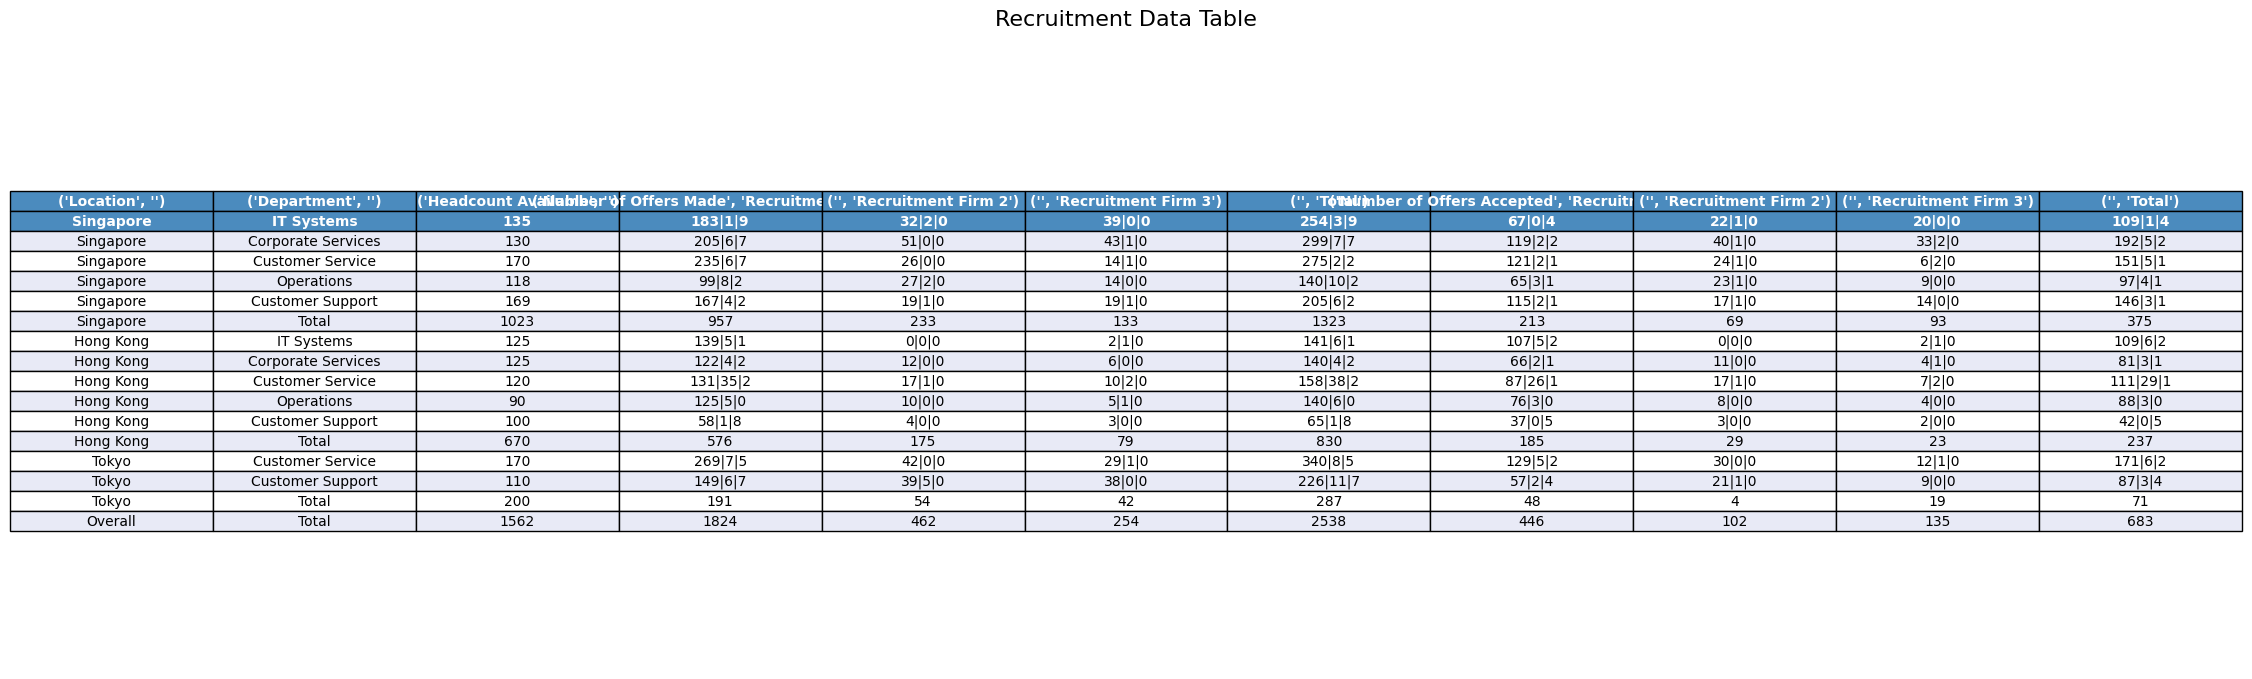

In [9]:
# Function to display the table similar to your uploaded image using Matplotlib
def display_custom_table(df):
    fig, ax = plt.subplots(figsize=(16, 8))  # Adjust the size according to the table

    # Multi-level headers for better presentation
    headers = [
        ['Location', 'Department', 'Headcount Available', 'Number of Offers Made', '', '', '', 'Number of Offers Accepted', '', '', ''],
        ['', '', '', 'Recruitment Firm 1', 'Recruitment Firm 2', 'Recruitment Firm 3', 'Total', 'Recruitment Firm 1', 'Recruitment Firm 2', 'Recruitment Firm 3', 'Total']
    ]

    # Apply multi-level headers to the DataFrame
    df.columns = pd.MultiIndex.from_tuples(zip(*headers))

    # Hide axes for a clean look
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Display the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Adjust font size and scale to fit content
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.8, 1.2)

    # Set alternating row colors for better readability
    for (i, j), cell in table.get_celld().items():
        if i == 0 or i == 1:  # Header rows
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#4B8BBE')
        elif i % 2 == 0:  # Even rows
            cell.set_facecolor('#E8EAF6')
        else:
            cell.set_facecolor('white')  # Odd rows

    # Set the title of the table
    plt.title('Recruitment Data Table', fontsize=16, pad=20)
    plt.show()

# Display the fetched data in a graphical table format
if df is not None:
    display_custom_table(df)
